In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
import os
from scipy.optimize import curve_fit

In [3]:
lowers=['0','0.05','0.45','1.05','1.45','2.05','2.45']
uppers=['0.05','0.45','1.05','1.45','2.05','2.45','3.05']

dfs=[pd.read_csv(os.path.join('{}/'.format(lowers[i]),'{lower}-{upper}.csv'.format(lower=lowers[i], upper=uppers[i]))) for i in range(7)]
dfs_other=[pd.read_csv(os.path.join('{}_other/'.format(lowers[i]),'{lower}-{upper}.csv'.format(lower=lowers[i], upper=uppers[i]))) for i in range(7)]

In [4]:
def line_fit(x,m,c):
    return m*x+c

/tmp/ipykernel_29057/3358790980.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


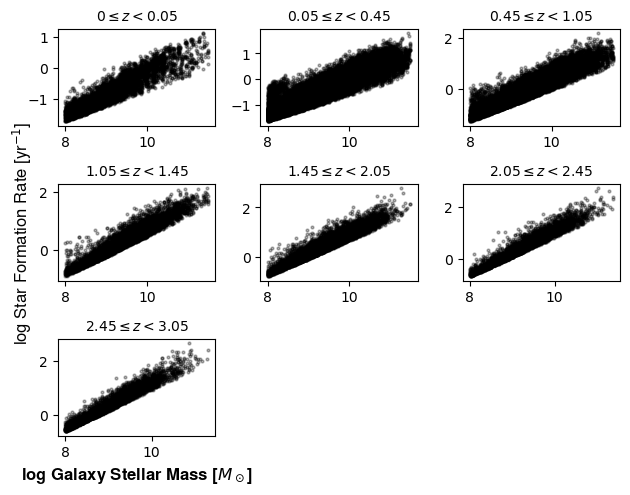

In [6]:
x=np.linspace(8,11.5,100)

labels=['$0 \leq z <0.05$','$0.05 \leq z <0.45$','$0.45 \leq z <1.05$','$1.05 \leq z <1.45$','$1.45 \leq z <2.05$','$2.05 \leq z <2.45$','$2.45 \leq z <3.05$']
i=0
hfont = {'fontname':'Nimbus Sans'}

for df in dfs:
    plt.subplot(3,3,i+1)
    plt.title('{}'.format(labels[i]),**hfont,fontsize='medium')
    plt.scatter(np.log10(df['$M_{stellar},M_{\odot}$']),np.log10(df['SFR($M_{\odot}/yr$)']),s=4,label=labels[i],color='black',alpha=0.3)
    plt.tight_layout()
    if i==6:
        plt.xlabel('log Galaxy Stellar Mass [$M_\odot$]',**hfont,fontsize='large',fontweight='bold')
    if i==3:
        plt.ylabel('log Star Formation Rate [yr$^{-1}$]',**hfont,fontsize='large')
    i+=1

/tmp/ipykernel_29057/3705908072.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


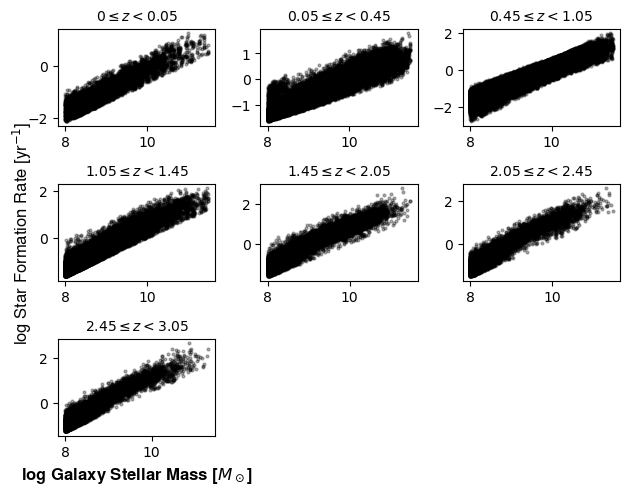

In [8]:
i=0
for df in dfs_other:
    plt.subplot(3,3,i+1)
    plt.title('{}'.format(labels[i]),**hfont,fontsize='medium')
    plt.scatter(np.log10(df['$M_{stellar},M_{\odot}$']),np.log10(df['SFR($M_{\odot}/yr$)']),s=4,label=labels[i],color='black',alpha=0.3)
    plt.tight_layout()
    if i==6:
        plt.xlabel('log Galaxy Stellar Mass [$M_\odot$]',**hfont,fontsize='large',fontweight='bold')
    if i==3:
        plt.ylabel('log Star Formation Rate [yr$^{-1}$]',**hfont,fontsize='large')
    i+=1

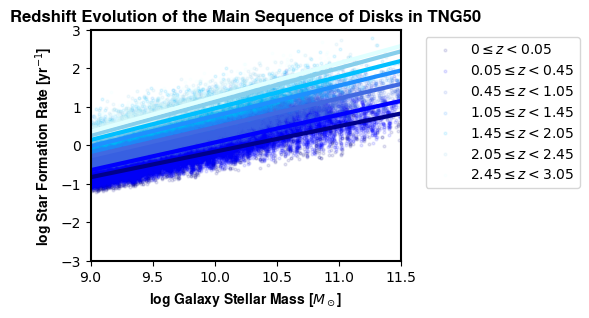

In [19]:
fig,ax=plt.subplots(figsize=(4,3))

i=0
colors=['darkblue','blue','royalblue','dodgerblue','deepskyblue','skyblue','lightcyan']
for df in dfs:
    plt.scatter(np.log10(df['$M_{stellar},M_{\odot}$']),np.log10(df['SFR($M_{\odot}/yr$)']),s=4,label=labels[i],alpha=0.1,color=colors[i])
    a=np.log10(df[df['$M_{stellar},M_{\odot}$']>1e+9]['$M_{stellar},M_{\odot}$'])
    b=np.log10(df[df['$M_{stellar},M_{\odot}$']>1e+9]['SFR($M_{\odot}/yr$)'])
    popt,_=curve_fit(line_fit,a,b)
    plt.plot(x,popt[0]*x+popt[1],linewidth=3,color=colors[i])
    i+=1
    
hfont = {'fontname':'Nimbus Sans'}
plt.title('Redshift Evolution of the Main Sequence of Disks in TNG50',**hfont,fontsize='large',fontweight='bold')
plt.xlabel('log Galaxy Stellar Mass [$M_\\odot$]',**hfont,fontsize='medium',fontweight='bold')
plt.ylabel('log Star Formation Rate [yr$^{-1}$]',**hfont,fontsize='medium',fontweight='bold')
plt.xlim(9,11.5)
plt.ylim(-3,3)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.legend(bbox_to_anchor=[1.6,1],loc='upper right')
plt.show()

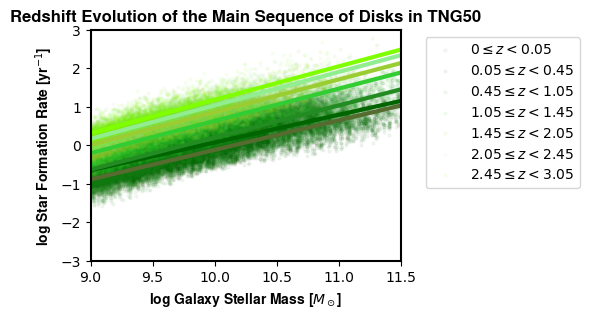

In [17]:
fig,ax=plt.subplots(figsize=(4,3))

i=0
colors=['darkolivegreen','darkgreen','forestgreen','limegreen','yellowgreen','lightgreen','chartreuse']
for df in dfs_other:
    plt.scatter(np.log10(df['$M_{stellar},M_{\odot}$']),np.log10(df['SFR($M_{\odot}/yr$)']),s=4,label=labels[i],alpha=0.05,color=colors[i])
    a=np.log10(df[df['$M_{stellar},M_{\odot}$']>1e+9]['$M_{stellar},M_{\odot}$'])
    b=np.log10(df[df['$M_{stellar},M_{\odot}$']>1e+9]['SFR($M_{\odot}/yr$)'])
    popt,_=curve_fit(line_fit,a,b)
    plt.plot(x,popt[0]*x+popt[1],linewidth=3,color=colors[i])
    i+=1
    
hfont = {'fontname':'Nimbus Sans'}
plt.title('Redshift Evolution of the Main Sequence of Disks in TNG50',**hfont,fontsize='large',fontweight='bold')
plt.xlabel('log Galaxy Stellar Mass [$M_\\odot$]',**hfont,fontsize='medium',fontweight='bold')
plt.ylabel('log Star Formation Rate [yr$^{-1}$]',**hfont,fontsize='medium',fontweight='bold')
plt.xlim(9,11.5)
plt.ylim(-3,3)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.legend(bbox_to_anchor=[1.6,1],loc='upper right')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(4,3))

labels=['$0 \leq z <0.05$','$0.05 \leq z <0.45$','$0.45 \leq z <1.05$','$1.05 \leq z <1.45$']
i=0

for df in dfs[0:4]:
    plt.scatter(np.log10(df['$M_{stellar},M_{\odot}$']),np.log10(df['$R_{1/2M_*}$']),s=5,label=labels[2-i],alpha=0.3)
    a=np.log10(df['$M_{stellar},M_{\odot}$'])
    b=np.log10(df['$R_{1/2M_*}(kpc)$'])
    i+=1
    
hfont = {'fontname':'Nimbus Sans'}
plt.xlim(8,11.5)
plt.title('Redshift Evolution of the Size-Mass Relation of Disks in TNG50',**hfont,fontsize='large',fontweight='bold')
plt.xlabel('log Galaxy Stellar Mass [$M_\odot$]',**hfont,fontsize='medium',fontweight='bold')
plt.ylabel('log $R_{eff}$',**hfont,fontsize='medium',fontweight='bold')
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
plt.ylim(-1.5,1.5)
plt.legend(bbox_to_anchor=[1.6,1],loc='upper right')
plt.show()